In [29]:
#Importinhg necessary libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [30]:
#Reading the dataset
df=pd.read_csv('titanic_Dataset.csv')
#Displaying the first 5 rows of the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
#Checking the null values of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [32]:
#Taking only the necessary columns
df1 = df[['Survived', 'Age', 'Sex', 'Pclass']]
df1 = pd.get_dummies(df1, columns=['Sex', 'Pclass'])
df1.dropna(inplace=True)

In [33]:
df1[['Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2', 'Pclass_3']] = df1[['Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2', 'Pclass_3']].astype(int)

In [34]:
df1.head()

,Survived,Age,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,0,1,0,0,1
1,1,38.0,1,0,1,0,0
2,1,26.0,1,0,0,0,1
3,1,35.0,1,0,1,0,0
4,0,35.0,0,1,0,0,1


In [35]:
#Dividing the dataset into dependent and independent variables
X=df1.drop('Survived', axis=1)
y=df1['Survived']

In [36]:
print(X)
print(y)

      Age  Sex_female  Sex_male  Pclass_1  Pclass_2  Pclass_3
0    22.0           0         1         0         0         1
1    38.0           1         0         1         0         0
2    26.0           1         0         0         0         1
3    35.0           1         0         1         0         0
4    35.0           0         1         0         0         1
..    ...         ...       ...       ...       ...       ...
885  39.0           1         0         0         0         1
886  27.0           0         1         0         1         0
887  19.0           1         0         1         0         0
889  26.0           0         1         1         0         0
890  32.0           0         1         0         0         1

[714 rows x 6 columns]
0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 714, dtype: int64


**TRAIN THE MODEL**

In [37]:
#Splitting the dataset into X and 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y,random_state=42)

In [56]:
#Importing the Logistic Regression model
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression(random_state=0)
from sklearn.model_selection import GridSearchCV
#Creating the hyperparameter grid
param={'C':[0.1,0,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100],'penalty':['l1','l2']}
#Instantiating the GridSearchCV object
grid_regressor=GridSearchCV(logistic,param_grid=param,cv=5)
#Fitting the model
grid_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=0),
             param_grid={'C': [0.1, 0, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,
                               60, 65, 70, 75, 80, 85, 90, 95, 100],
                         'penalty': ['l1', 'l2']})

In [57]:
grid_regressor.best_params_

{'C': 45, 'penalty': 'l2'}

In [58]:
grid_regressor.best_score_

0.8115353535353534

In [59]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
y_pred = grid_regressor.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
cm

array([[103,  25],
       [ 24,  63]])

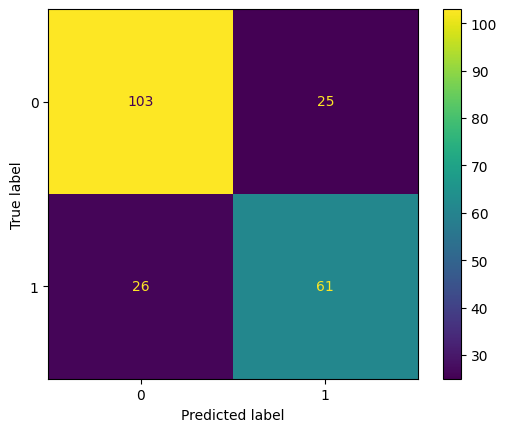

In [43]:
#Plotting the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=logistic .classes_)
disp.plot()


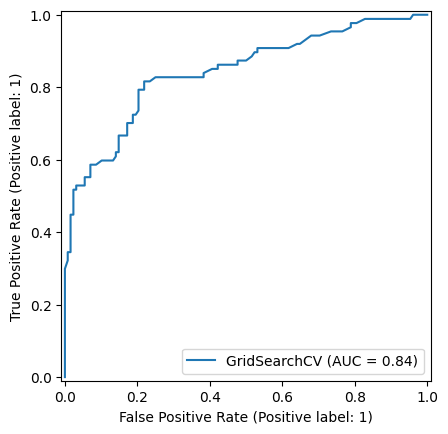

In [61]:
#ROC Curve for the model
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(grid_regressor, X_test, y_test)

In [62]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81       128
           1       0.72      0.72      0.72        87

    accuracy                           0.77       215
   macro avg       0.76      0.76      0.76       215
weighted avg       0.77      0.77      0.77       215



**TEST THE MODEL**

In [64]:
#Probability the survival for a 30 year old female passenger
female = [[30, 1, 0, 1, 0, 0]]
prediction_female=grid_regressor.predict(female)
prediction_female[0]

1

In [66]:
#Probability of 30 year old female passenger survival 
probability = grid_regressor.predict_proba(female)[0][1]
print(f"Probability of female pasasenger survival is :{probability:.1%}")

Probability of female pasasenger survival is :94.0%


In [67]:
#Predicting the survival for a 60 year old male passenger
male = [[60, 0, 1, 1, 0, 0]]
prediction_male=grid_regressor.predict(male)
prediction_male[0]

0

In [68]:
#Probability of 60 year old male passenger survival 
probability = grid_regressor.predict_proba(male)[0][1]
print(f"Probability of male pasasenger survival is :{probability:.1%}")

Probability of male pasasenger survival is :28.2%
